### 한국어 형태소 분석
- Hannanum
- Kkma
- Komoran
- Mecab
- Okt
- Khaii

### Okt 형태소 분석기 사용

In [1]:
from konlpy.tag import Okt
okt = Okt() # 형태소, 명사만, 어절, 품사태깅 가능
# okt = Okt(stem=True)

In [2]:
data = '오늘 날씨가 추워서 기분이 좋지않다.'

In [3]:
# 형태소 단위로 분석 - 형태소: 의미를 가진 가장 작은 단위
okt.morphs(data)

['오늘', '날씨', '가', '추워서', '기분', '이', '좋지', '않다', '.']

In [4]:
# 명사 추출
okt.nouns(data)

['오늘', '날씨', '기분']

In [5]:
# 어절 추출
okt.phrases(data)

['오늘', '오늘 날씨', '기분', '날씨']

In [6]:
# 품사 태깅
okt.pos(data)

[('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('추워서', 'Adjective'),
 ('기분', 'Noun'),
 ('이', 'Josa'),
 ('좋지', 'Adjective'),
 ('않다', 'Verb'),
 ('.', 'Punctuation')]

### 단어 빈도 계산

In [7]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('ratings.txt', delimiter='\t')
df

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [10]:
x = df['document'][:3000]
x

0                                     어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1       디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                    폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3       와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                             안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
                              ...                        
2995                                                   개쩜
2996    힐링무비 ~ 아역배우들이 정말 연기 잘하네요 .. 그리고 간지나는 파지아저씨 최민수...
2997     어릴적 봤던 영화인데~ 또 보고싶네요. 구해서 보고싶네요~비됴말고 dvd 가 있을까요?
2998                                           제시카 알바 좋아요
2999                                         정말 멋진 영화입니다.
Name: document, Length: 3000, dtype: object

In [13]:
n = []

for i in x:
    n.append(i)
n

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음',
 '굿',
 '바보가 아니라 병 쉰 인듯',
 '내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...',
 '재밌다',
 '고질라니무 귀엽다능ㅋㅋ',
 '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.',
 '3도 반전 좋았제 ^^',
 '평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.',
 '네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..',
 '단연 최고',
 '가면 갈수록 더욱 빠져드네요 밀회 화이팅!!',
 '어?생각없이 봤는데 상당한 수작.일본영화 10년내 최고로 마음에 들었다.강렬한 임팩트가 일품.',
 '오랜만에 본 제대로 된 범죄스릴러~',
 "그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때. 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다.",
 '마지막씬을 잊을수가 없다',
 '강압적용서,세뇌적용서에 대한 비판',
 '중세시대명작. 굿 평점이왜이래',
 '7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다. 아름답고 슬픈 OST

In [14]:
okt = Okt()
noun = okt.nouns(str(n))

In [15]:
count = Counter(noun)

In [16]:
count

Counter({'때': 106,
         '보고': 119,
         '지금': 66,
         '다시': 94,
         '디자인': 1,
         '학생': 5,
         '외국': 1,
         '디자이너': 1,
         '그': 94,
         '일군': 1,
         '전통': 5,
         '통해': 9,
         '발전': 6,
         '문화': 4,
         '산업': 2,
         '사실': 20,
         '우리나라': 9,
         '시절': 10,
         '끝': 23,
         '열정': 7,
         '노라노': 1,
         '저': 33,
         '사람': 110,
         '꿈': 17,
         '수': 88,
         '것': 121,
         '폴리스스토리': 1,
         '시리즈': 24,
         '부터': 5,
         '뉴': 1,
         '하나': 54,
         '최고': 230,
         '연기': 142,
         '진짜': 184,
         '개': 24,
         '생각': 140,
         '몰입': 20,
         '영화': 985,
         '안개': 2,
         '밤하늘': 1,
         '초승달': 1,
         '사랑': 78,
         '라면': 16,
         '처음': 36,
         '완전': 53,
         '감동': 155,
         '전쟁': 20,
         '빠': 4,
         '굿': 37,
         '바보': 4,
         '병': 4,
         '쉰': 1,
         '내': 90,
       

In [17]:
# 명사 빈도 카운트
noun_list = count.most_common(100)

In [18]:
for i in noun_list:
    print(i)

('영화', 985)
('정말', 265)
('최고', 230)
('진짜', 184)
('감동', 155)
('이', 155)
('연기', 142)
('생각', 140)
('것', 121)
('드라마', 121)
('보고', 119)
('사람', 110)
('점', 107)
('때', 106)
('평점', 103)
('다시', 94)
('그', 94)
('더', 91)
('내', 90)
('수', 88)
('마지막', 80)
('사랑', 78)
('거', 75)
('말', 73)
('왜', 70)
('스토리', 69)
('작품', 67)
('지금', 66)
('볼', 66)
('나', 65)
('배우', 65)
('명작', 61)
('재미', 59)
('마음', 56)
('하나', 54)
('완전', 53)
('이영화', 52)
('듯', 51)
('추천', 50)
('장면', 49)
('매력', 49)
('느낌', 47)
('감독', 47)
('꼭', 46)
('내용', 46)
('현실', 46)
('또', 45)
('액션', 45)
('이야기', 43)
('그냥', 43)
('중', 43)
('가슴', 43)
('주인공', 42)
('정도', 42)
('이해', 40)
('한번', 40)
('좀', 40)
('난', 39)
('인생', 38)
('굿', 37)
('역시', 37)
('음악', 37)
('처음', 36)
('기억', 35)
('여운', 35)
('뭐', 35)
('남자', 34)
('알', 34)
('눈물', 34)
('우리', 34)
('저', 33)
('인간', 33)
('시간', 33)
('대박', 32)
('한국', 32)
('편', 32)
('결말', 30)
('가족', 30)
('걸', 30)
('모습', 29)
('연기력', 29)
('삶', 28)
('최고다', 27)
('번', 27)
('만', 26)
('대한', 26)
('영상', 26)
('보기', 26)
('짱', 26)
('안', 26)
('아이', 26)
('가장',

### 단어 리스트 만들기

In [19]:
word_list = []
word_list = df['document'][:3000]

In [20]:
t  = []

for i in word_list:
    morph = okt.pos(i)
    t.append(morph)

### 명사 추출

In [21]:
noun_list = []
for s in t:
    for word, tag in s :
        if tag in ['Noun']: 
            noun_list.append(word)

In [22]:
noun_list

['때',
 '보고',
 '지금',
 '다시',
 '디자인',
 '학생',
 '외국',
 '디자이너',
 '그',
 '일군',
 '전통',
 '통해',
 '발전',
 '문화',
 '산업',
 '사실',
 '우리나라',
 '그',
 '시절',
 '끝',
 '열정',
 '노라노',
 '전통',
 '저',
 '사람',
 '꿈',
 '수',
 '것',
 '폴리스스토리',
 '시리즈',
 '부터',
 '뉴',
 '하나',
 '최고',
 '연기',
 '진짜',
 '개',
 '생각',
 '몰입',
 '진짜',
 '영화',
 '안개',
 '밤하늘',
 '초승달',
 '영화',
 '사랑',
 '사람',
 '라면',
 '처음',
 '끝',
 '영화',
 '완전',
 '감동',
 '다시',
 '감동',
 '개',
 '전쟁',
 '빠',
 '보고',
 '굿',
 '바보',
 '병',
 '쉰',
 '내',
 '나이',
 '영화',
 '지금',
 '나',
 '감동',
 '훗날',
 '다시',
 '사하나',
 '그',
 '감정',
 '이해',
 '고질',
 '무',
 '능',
 '영화',
 '오페라',
 '작품',
 '극단',
 '평',
 '갈림',
 '수',
 '듯',
 '도',
 '반전',
 '제',
 '평점',
 '왜',
 '긴장감',
 '스릴',
 '감',
 '진짜',
 '최고',
 '진짜',
 '전장',
 '공포',
 '전',
 '고시',
 '터',
 '소재',
 '뿐',
 '관련',
 '단연',
 '최고',
 '가면',
 '갈수록',
 '더욱',
 '드',
 '밀회',
 '화이팅',
 '생각',
 '수작',
 '일본',
 '영화',
 '최고',
 '마음',
 '임팩트',
 '일품',
 '만',
 '제대로',
 '범죄',
 '스릴러',
 '때',
 '사랑',
 '도',
 '마디',
 '말',
 '밤',
 '잠',
 '때',
 '징텅',
 '교복',
 '션',
 '이의',
 '볼펜',
 '자국',
 '역시',
 '미처',
 '전하',
 '못',
 '마음',
 '형태',
 '거',

### 두 글자 이상 단어만 추출

In [23]:
noun_list2 = [n for n in noun_list if len(n) > 1]

In [24]:
noun_list2

['보고',
 '지금',
 '다시',
 '디자인',
 '학생',
 '외국',
 '디자이너',
 '일군',
 '전통',
 '통해',
 '발전',
 '문화',
 '산업',
 '사실',
 '우리나라',
 '시절',
 '열정',
 '노라노',
 '전통',
 '사람',
 '폴리스스토리',
 '시리즈',
 '부터',
 '하나',
 '최고',
 '연기',
 '진짜',
 '생각',
 '몰입',
 '진짜',
 '영화',
 '안개',
 '밤하늘',
 '초승달',
 '영화',
 '사랑',
 '사람',
 '라면',
 '처음',
 '영화',
 '완전',
 '감동',
 '다시',
 '감동',
 '전쟁',
 '보고',
 '바보',
 '나이',
 '영화',
 '지금',
 '감동',
 '훗날',
 '다시',
 '사하나',
 '감정',
 '이해',
 '고질',
 '영화',
 '오페라',
 '작품',
 '극단',
 '갈림',
 '반전',
 '평점',
 '긴장감',
 '스릴',
 '진짜',
 '최고',
 '진짜',
 '전장',
 '공포',
 '고시',
 '소재',
 '관련',
 '단연',
 '최고',
 '가면',
 '갈수록',
 '더욱',
 '밀회',
 '화이팅',
 '생각',
 '수작',
 '일본',
 '영화',
 '최고',
 '마음',
 '임팩트',
 '일품',
 '제대로',
 '범죄',
 '스릴러',
 '사랑',
 '마디',
 '징텅',
 '교복',
 '이의',
 '볼펜',
 '자국',
 '역시',
 '미처',
 '전하',
 '마음',
 '형태',
 '마지막',
 '강압',
 '용서',
 '세뇌',
 '용서',
 '대한',
 '비판',
 '중세시대',
 '명작',
 '평점',
 '영상',
 '존재',
 '한번',
 '제니퍼',
 '코넬',
 '아역시절',
 '로버트',
 '드니',
 '마지막',
 '장면',
 '정말',
 '가슴속',
 '기억',
 '최고',
 '명작',
 '사람',
 '수가',
 '인간',
 '잠재',
 '악마',
 '성은',
 '여러',
 '시간',
 '공간',
 '존속

###  단어 별 개수 세기

In [25]:
counts = Counter(noun_list2)

In [26]:
counts

Counter({'보고': 119,
         '지금': 66,
         '다시': 94,
         '디자인': 1,
         '학생': 5,
         '외국': 1,
         '디자이너': 1,
         '일군': 1,
         '전통': 5,
         '통해': 9,
         '발전': 6,
         '문화': 4,
         '산업': 2,
         '사실': 20,
         '우리나라': 9,
         '시절': 10,
         '열정': 7,
         '노라노': 1,
         '사람': 110,
         '폴리스스토리': 1,
         '시리즈': 24,
         '부터': 5,
         '하나': 54,
         '최고': 230,
         '연기': 142,
         '진짜': 184,
         '생각': 140,
         '몰입': 20,
         '영화': 985,
         '안개': 2,
         '밤하늘': 1,
         '초승달': 1,
         '사랑': 78,
         '라면': 16,
         '처음': 36,
         '완전': 53,
         '감동': 155,
         '전쟁': 20,
         '바보': 4,
         '나이': 15,
         '훗날': 1,
         '사하나': 2,
         '감정': 18,
         '이해': 40,
         '고질': 1,
         '오페라': 7,
         '작품': 67,
         '극단': 1,
         '갈림': 1,
         '반전': 23,
         '평점': 103,
         '긴장감': 21,
         '스릴

In [27]:
tags = counts.most_common(200)
tags

[('영화', 985),
 ('정말', 265),
 ('최고', 230),
 ('진짜', 184),
 ('감동', 155),
 ('연기', 142),
 ('생각', 140),
 ('드라마', 121),
 ('보고', 119),
 ('사람', 110),
 ('평점', 103),
 ('다시', 94),
 ('마지막', 80),
 ('사랑', 78),
 ('스토리', 69),
 ('작품', 67),
 ('지금', 66),
 ('배우', 65),
 ('명작', 61),
 ('재미', 59),
 ('마음', 56),
 ('하나', 54),
 ('완전', 53),
 ('이영화', 52),
 ('추천', 50),
 ('장면', 49),
 ('매력', 49),
 ('느낌', 47),
 ('감독', 47),
 ('내용', 46),
 ('현실', 46),
 ('액션', 45),
 ('이야기', 43),
 ('그냥', 43),
 ('가슴', 43),
 ('주인공', 42),
 ('정도', 42),
 ('이해', 40),
 ('한번', 40),
 ('인생', 38),
 ('역시', 37),
 ('음악', 37),
 ('처음', 36),
 ('기억', 35),
 ('여운', 35),
 ('남자', 34),
 ('눈물', 34),
 ('우리', 34),
 ('인간', 33),
 ('시간', 33),
 ('대박', 32),
 ('한국', 32),
 ('결말', 30),
 ('가족', 30),
 ('모습', 29),
 ('연기력', 29),
 ('최고다', 27),
 ('대한', 26),
 ('영상', 26),
 ('보기', 26),
 ('아이', 26),
 ('가장', 26),
 ('소재', 25),
 ('모든', 25),
 ('연출', 25),
 ('여자', 25),
 ('시리즈', 24),
 ('모두', 24),
 ('개인', 24),
 ('부분', 24),
 ('반전', 23),
 ('때문', 23),
 ('계속', 23),
 ('무엇', 23),
 ('당시', 22),
 ('공감

In [28]:
dic = dict(tags)
dic

{'영화': 985,
 '정말': 265,
 '최고': 230,
 '진짜': 184,
 '감동': 155,
 '연기': 142,
 '생각': 140,
 '드라마': 121,
 '보고': 119,
 '사람': 110,
 '평점': 103,
 '다시': 94,
 '마지막': 80,
 '사랑': 78,
 '스토리': 69,
 '작품': 67,
 '지금': 66,
 '배우': 65,
 '명작': 61,
 '재미': 59,
 '마음': 56,
 '하나': 54,
 '완전': 53,
 '이영화': 52,
 '추천': 50,
 '장면': 49,
 '매력': 49,
 '느낌': 47,
 '감독': 47,
 '내용': 46,
 '현실': 46,
 '액션': 45,
 '이야기': 43,
 '그냥': 43,
 '가슴': 43,
 '주인공': 42,
 '정도': 42,
 '이해': 40,
 '한번': 40,
 '인생': 38,
 '역시': 37,
 '음악': 37,
 '처음': 36,
 '기억': 35,
 '여운': 35,
 '남자': 34,
 '눈물': 34,
 '우리': 34,
 '인간': 33,
 '시간': 33,
 '대박': 32,
 '한국': 32,
 '결말': 30,
 '가족': 30,
 '모습': 29,
 '연기력': 29,
 '최고다': 27,
 '대한': 26,
 '영상': 26,
 '보기': 26,
 '아이': 26,
 '가장': 26,
 '소재': 25,
 '모든': 25,
 '연출': 25,
 '여자': 25,
 '시리즈': 24,
 '모두': 24,
 '개인': 24,
 '부분': 24,
 '반전': 23,
 '때문': 23,
 '계속': 23,
 '무엇': 23,
 '당시': 22,
 '공감': 22,
 '긴장감': 21,
 '자신': 21,
 '이건': 21,
 '사실': 20,
 '몰입': 20,
 '전쟁': 20,
 '기대': 20,
 '대해': 20,
 '그녀': 20,
 '오늘': 20,
 '강추': 19,
 '캐릭터': 19,
 '뭔가': 19,

### 워드클라우드 생성

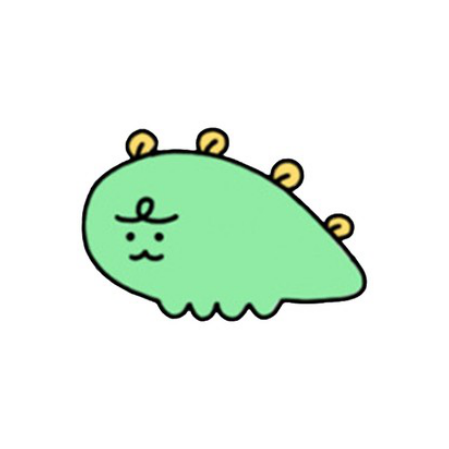

In [32]:
from PIL import Image # 워드클라우드용 마스크를 생성하기 위한 라이브러리
import matplotlib.pyplot as plt


custom_mask = np.array(Image.open('죠르디이미지.jpg'))
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [34]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(custom_mask) # 마스킹용 사진의 색을 입력

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'Malgun Gothic',
                     background_color = 'black', 
                     width=800, height=600,
                     max_words=200,
                     mask=custom_mask,
                     max_font_size=30)
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud.recolor(color_func=-image_colors), interpolation='bilinear')
plt.show()

{'영화': 985, '정말': 265, '최고': 230, '진짜': 184, '감동': 155, '연기': 142, '생각': 140, '드라마': 121, '보고': 119, '사람': 110, '평점': 103, '다시': 94, '마지막': 80, '사랑': 78, '스토리': 69, '작품': 67, '지금': 66, '배우': 65, '명작': 61, '재미': 59, '마음': 56, '하나': 54, '완전': 53, '이영화': 52, '추천': 50, '장면': 49, '매력': 49, '느낌': 47, '감독': 47, '내용': 46, '현실': 46, '액션': 45, '이야기': 43, '그냥': 43, '가슴': 43, '주인공': 42, '정도': 42, '이해': 40, '한번': 40, '인생': 38, '역시': 37, '음악': 37, '처음': 36, '기억': 35, '여운': 35, '남자': 34, '눈물': 34, '우리': 34, '인간': 33, '시간': 33, '대박': 32, '한국': 32, '결말': 30, '가족': 30, '모습': 29, '연기력': 29, '최고다': 27, '대한': 26, '영상': 26, '보기': 26, '아이': 26, '가장': 26, '소재': 25, '모든': 25, '연출': 25, '여자': 25, '시리즈': 24, '모두': 24, '개인': 24, '부분': 24, '반전': 23, '때문': 23, '계속': 23, '무엇': 23, '당시': 22, '공감': 22, '긴장감': 21, '자신': 21, '이건': 21, '사실': 20, '몰입': 20, '전쟁': 20, '기대': 20, '대해': 20, '그녀': 20, '오늘': 20, '강추': 19, '캐릭터': 19, '뭔가': 19, '노래': 19, '세상': 19, '아주': 19, '감정': 18, '수작': 18, '한국영': 18, '중간': 18, '제목': 18, '표현': 

OSError: cannot open resource